# Exercise - Dummies and VIF

Please run all the cells below and find the exercise at the bottom of the notebook.

## Importing the relevant libraries

In [88]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [89]:
test=[1,2,3,4,5,6]
test
type(test)


list

In [90]:
# dir(pd)

In [91]:
# dir(test)

In [92]:
# dir(np)

## Loading the raw data

In [93]:
raw_data = pd.read_csv("C:/Users/Nabiswa/Downloads/1.04.+Real-life+example.csv")
raw_data.head(20)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


## Preprocessing

### Exploring the descriptive statistics of the variables

In [94]:
raw_data.shape

(4345, 9)

In [35]:
raw_data.describe(include='all')
# issues
# missing data
# remove Model
#remove outliers

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [95]:
#drop()
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [96]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [97]:
data_no_mv = data.dropna(axis=0)

In [98]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

C:\Users\Nabiswa\AppData\Local\Temp\ipykernel_6416\216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

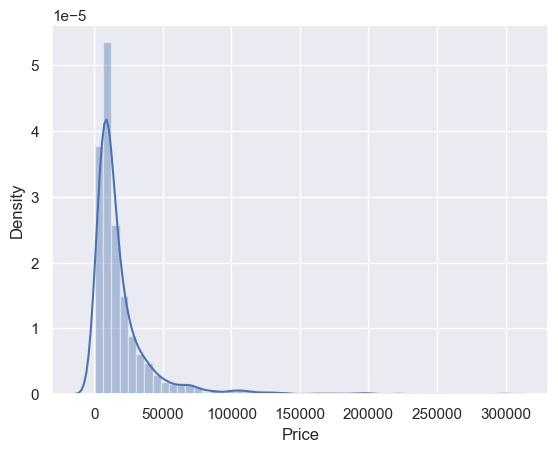

In [99]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [100]:
q = data_no_mv['Price'].quantile(0.9)
data_1 = data_no_mv[data_no_mv['Price']<q]


In [101]:
q

40996.0

In [102]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3622,3622.000000,3622,3622.000000,3622.000000,3622,3622,3622.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,850,NaN,1444,NaN,NaN,1608,3251,NaN
mean,NaN,12951.076521,NaN,177.020983,2.688192,NaN,NaN,2005.546107
std,NaN,9028.269200,NaN,97.240484,5.183080,NaN,NaN,6.507230
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6500.000000,NaN,110.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10400.000000,NaN,170.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,17500.000000,NaN,240.000000,2.800000,NaN,NaN,2011.000000


C:\Users\Nabiswa\AppData\Local\Temp\ipykernel_6416\2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

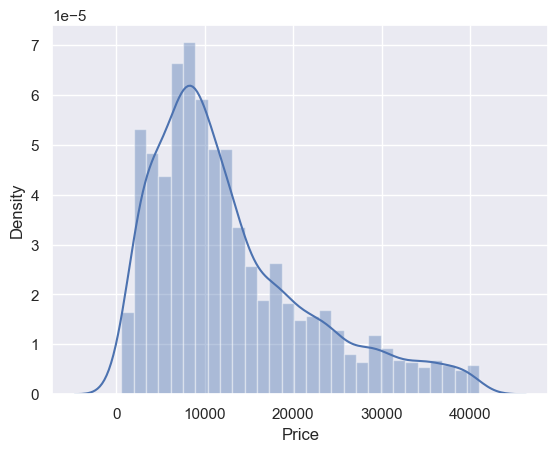

In [103]:
sns.distplot(data_1['Price'])

C:\Users\Nabiswa\AppData\Local\Temp\ipykernel_6416\534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

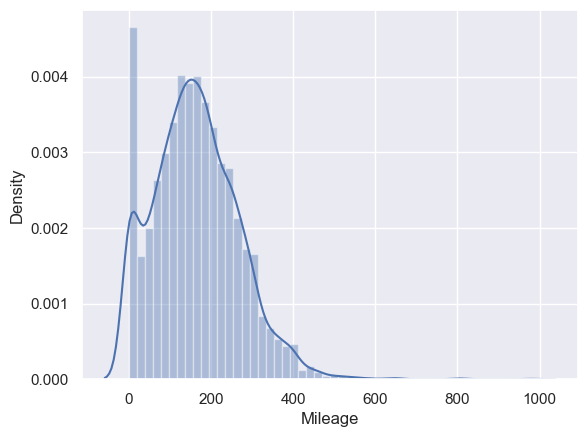

In [104]:
sns.distplot(data_no_mv['Mileage'])

In [105]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

In [106]:
q

439.5799999999999

In [107]:
data_2.describe()

,Price,Mileage,EngineV,Year
count,3585.000000,3585.000000,3585.000000,3585.000000
mean,13026.345651,173.630962,2.692254,2005.645467
std,9036.758192,91.481770,5.209167,6.431091
min,600.000000,0.000000,0.600000,1969.000000
25%,6700.000000,110.000000,1.800000,2002.000000
50%,10500.000000,168.000000,2.000000,2007.000000
75%,17700.000000,237.000000,2.800000,2011.000000
max,40990.000000,438.000000,99.990000,2016.000000


C:\Users\Nabiswa\AppData\Local\Temp\ipykernel_6416\1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

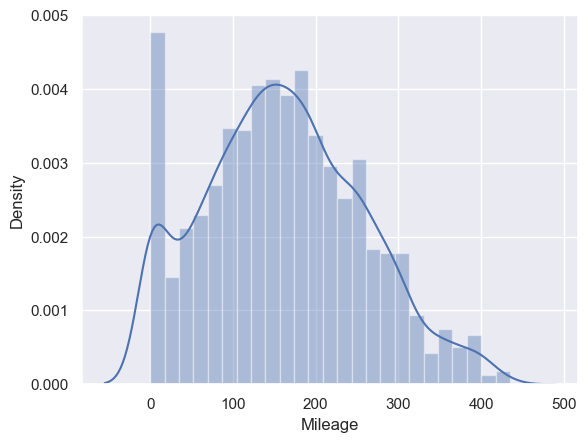

In [16]:
sns.distplot(data_2['Mileage'])

C:\Users\Nabiswa\AppData\Local\Temp\ipykernel_6416\823394628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

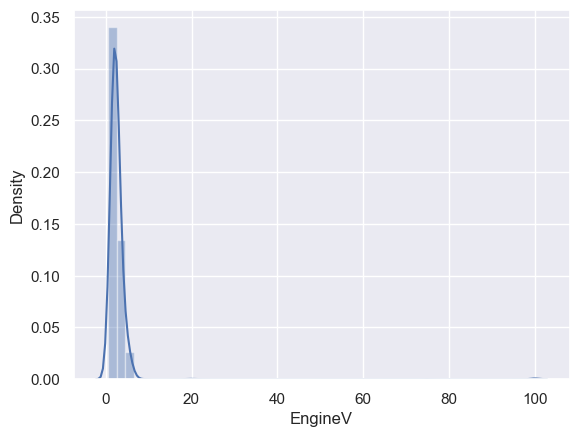

In [17]:
sns.distplot(data_no_mv['EngineV'])

In [108]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\Nabiswa\AppData\Local\Temp\ipykernel_6416\1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

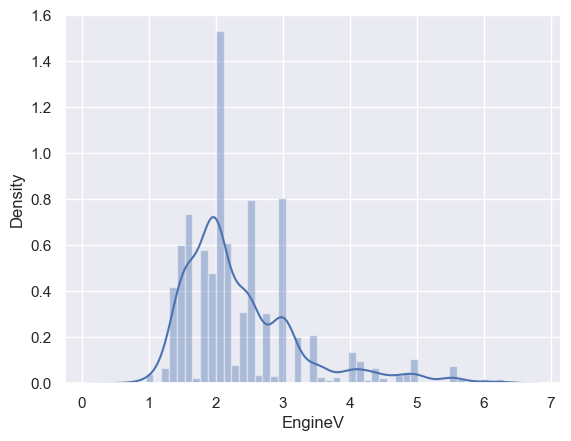

In [109]:
sns.distplot(data_3['EngineV'])

In [110]:
data_3.describe()

,Price,Mileage,EngineV,Year
count,3562.000000,3562.000000,3562.000000,3562.000000
mean,13054.694879,173.484559,2.357131,2005.658338
std,9038.477724,91.524033,0.885065,6.431660
min,600.000000,0.000000,0.600000,1969.000000
25%,6700.000000,110.000000,1.800000,2002.000000
50%,10500.000000,168.000000,2.000000,2007.000000
75%,17757.750000,236.000000,2.700000,2011.000000
max,40990.000000,438.000000,6.300000,2016.000000


C:\Users\Nabiswa\AppData\Local\Temp\ipykernel_6416\534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

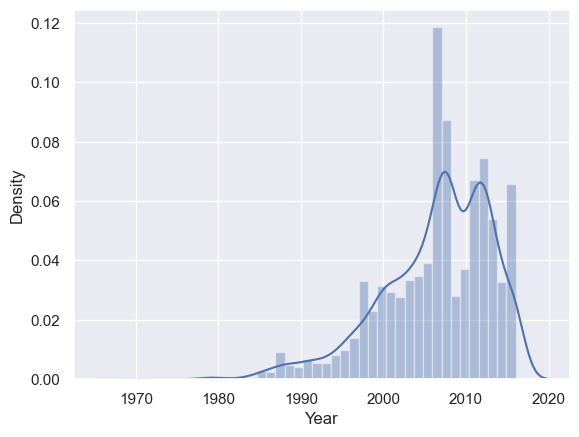

In [111]:
sns.distplot(data_no_mv['Year'])

In [114]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

In [115]:
q

1986.61

C:\Users\Nabiswa\AppData\Local\Temp\ipykernel_6416\2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

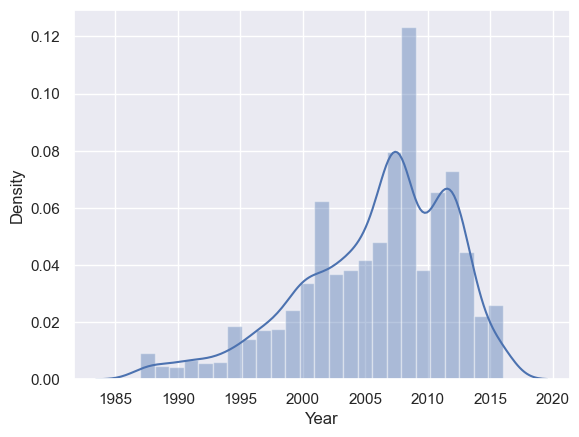

In [116]:
sns.distplot(data_4['Year'])

In [118]:
data_4.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [119]:
data_cleaned = data_4.reset_index(drop=True)

In [72]:
# data_cleaned.options.display.max_rows()==200

In [120]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [121]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3526,3526.000000,3526,3526.000000,3526.000000,3526,3526,3526.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,823,NaN,1393,NaN,NaN,1564,3164,NaN
mean,NaN,13150.859305,NaN,173.325581,2.360777,NaN,NaN,2005.884855
std,NaN,9016.444257,NaN,91.199599,0.887299,NaN,NaN,6.048721
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1987.000000
25%,NaN,6800.000000,NaN,110.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10500.000000,NaN,168.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,17800.000000,NaN,235.000000,2.700000,NaN,NaN,2011.000000


## Checking the OLS assumptions

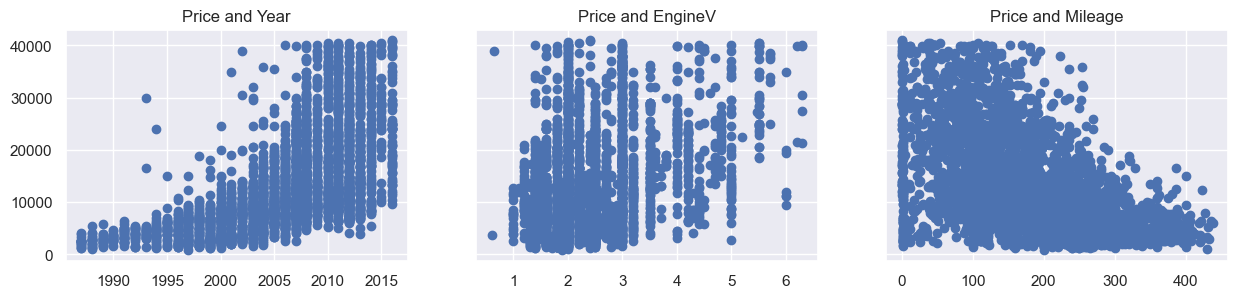

In [122]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

C:\Users\Nabiswa\AppData\Local\Temp\ipykernel_6416\462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

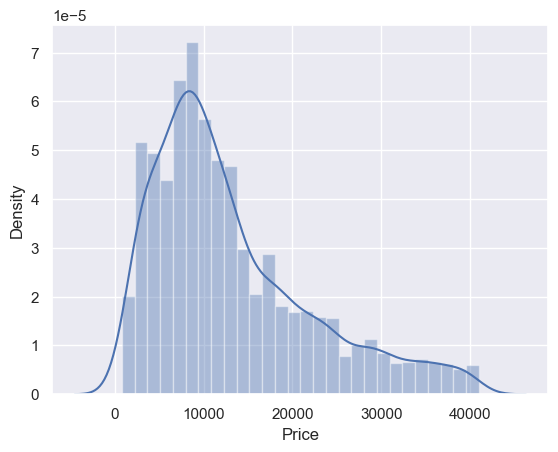

In [123]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [124]:
#dataframe['newcolumn'] = values
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


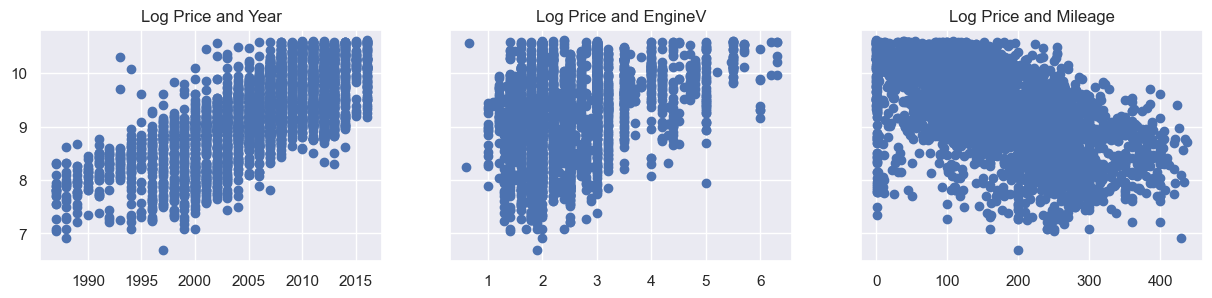

In [125]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [126]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [136]:
# data_cleaned['Brand']

In [133]:
# dir(data_cleaned['Brand'])

### Multicollinearity

In [137]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [139]:
vif

,VIF,features
0,4.653066,Mileage
1,10.520771,Year
2,8.197901,EngineV


In [140]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [161]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True, dtype=np.int8)

In [162]:
# help(convert_dtypes
#     )

In [163]:
# dir(pd.get_dummies(data_no_multicollinearity))

In [164]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [165]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [166]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [167]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# EXERCISE

### Part 1
Calculate the variance inflation factors for all variables contained in data_preprocessed. Anything strange?


In [169]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
variables_all = data_preprocessed
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables_all.values, i) for i in range(variables_all.shape[1])]
vif["features"] = variables_all.columns
vif

,VIF,features
0,46.050962,log_price
1,5.456067,Mileage
2,14.334528,EngineV
3,2.475708,Brand_BMW
4,2.973202,Brand_Mercedes-Benz
5,1.946773,Brand_Mitsubishi
6,2.445542,Brand_Renault
7,2.498372,Brand_Toyota
8,3.531532,Brand_Volkswagen
9,1.720626,Body_hatch


Obviously, 'log_price' has a very high VIF. This implies it is most definitely linearly correlated with all the other variables. And this is no surprise! We are using a linear regression to determine 'log_price' given values of the independent variables! This is exactly what we expect - a linear relationship!

However, to actually assess multicollinearity for the predictors, we have to drop 'log_price'. The multicollinearity assumption refers only to the idea that the independent variables shoud not be collinear.



### Part 2
your task is to calculate the variance inflation factor (VIF) of all variables including the dummies (but without the dependent variable).



In [170]:
# Let's simply drop log_price from data_preprocessed
variables = data_preprocessed.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,5.441541,Mileage
1,8.438515,EngineV
2,2.261847,Brand_BMW
3,2.815233,Brand_Mercedes-Benz
4,1.701181,Brand_Mitsubishi
5,2.186629,Brand_Renault
6,2.202046,Brand_Toyota
7,2.988921,Brand_Volkswagen
8,1.543707,Body_hatch
9,1.615265,Body_other


As you can see, all VIFs are pretty much acceptable. The ones that are particularly high are 'EngineV' and 'Registration_yes'. 

### Part 3
Now calculate the VIFs for a data frame where we include the dummies, without 'log_price', but DO NOT DROP THE FIRST DUMMY. Anything strange now?

In [171]:
# To solve this one, we must create a new variable with dummies, without dropping the first one
data_with_dummies_new = pd.get_dummies(data_no_multicollinearity, dtype= np.int8)#, drop_first=True)
# Let's simply drop 'log_price' from this new variable
variables = data_with_dummies_new.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

C:\Users\Nabiswa\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.292606,Mileage
1,1.634946,EngineV
2,inf,Brand_Audi
3,inf,Brand_BMW
4,inf,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,inf,Body_crossover


The result that we get is that very interesting indeed. Most VIFs are equal to inf, or plus infinity.

We even got an warning: RuntimeWarning: divide by zero encountered in double_scalars, vif = 1. / (1. - r_squared_i)

The main reason is what we've discussed before. When a car is an 'Audi' all other brand dummies are 0. When a car is not 'Audi', at least one of them will be 1. By including all dummies have introduced multicollinearity (perfect multicollinearity)!!!

If we run a regression including all these dummies, the coefficients would be inflated and completely off-mark.

Now you see why we need to drop one of the dummy variables for each feature.
